# 介绍 Keras


In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 8)

## 什么是keras?
- keras + TensorFlow
    - 是TensorFlow首选的高级框架
    - Keras是TensorFlow的补充
- 特征工程
![fe](../img/feature.png)

## 使用keras构建神经网络
- Nerual Network  
![nn](../img/simple_nn.png)

## 快速的Kera
构建一个简单的神经网络，以了解在 Keras 中完成此操作的速度有多快。

我们的目标是构建一个网络，该网络将两个数字作为输入，将它们传递到 10 个神经元的隐藏层，最后输出一个不受约束的数字。

通过避免在输出层中设置激活函数，可以获得无约束的输出。这对于回归等问题很有用，因为我们希望我们的输出能够采用任何不受约束的值。

![net](../img/nets.png)

In [26]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 创建一个Sequential模型
model = Sequential()

# 添加一个输入层和一个具有10个神经元的隐藏层
model.add(Dense(10,input_shape=(2,),activation='relu'))

#  添加一个含1个神经元的输出层
model.add(Dense(1))

#  打印模型的概述信息
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                30        
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


## 二分类

### 纸币真假判断
我们将通过使用Banknote鉴别数据集在Keras中练习构建分类模型。


同学们的目标是区分真假美元纸币。为了实现这一目标，数据集提供了4个特征：`variance`（方差）、`skewness`（偏斜度）、`curtosis`（峰度）和`entropy`（熵）。这些特征是通过对美元纸币图像应用数学运算得到的。**真假标签**存储在数据帧的`class`列中。


![dollar](../img/dollar.png)

In [27]:
banknotes = pd.read_csv('../data/banknotes.csv')
banknotes.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [28]:
# 数据归一化
X = banknotes.iloc[:,:4]
X = ((X-X.mean())/X.std()).to_numpy()
y = banknotes['class'].to_numpy()

c:\Users\20228\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


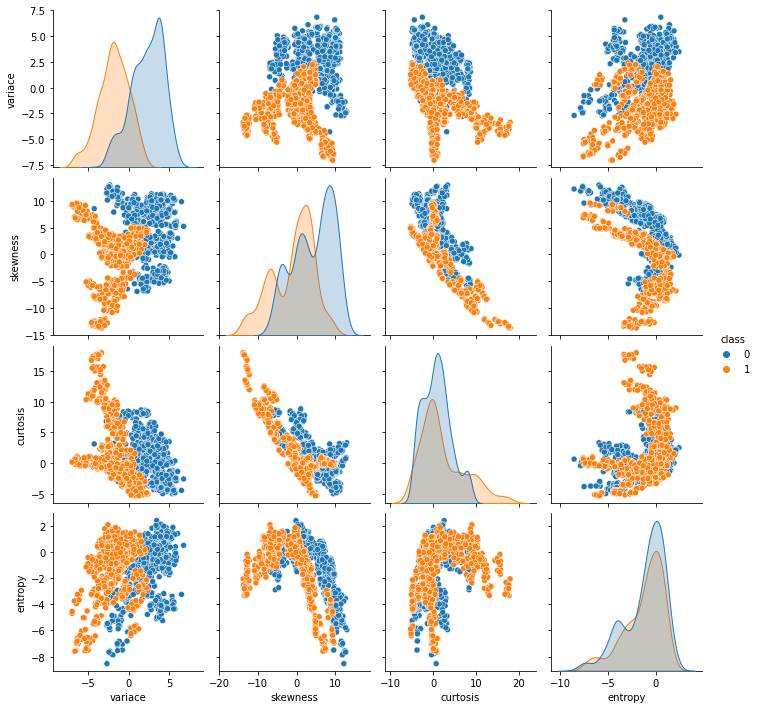

In [29]:
#使用pairplot，并将hue设置为我们的class列

sns.pairplot(banknotes,hue='class')

In [30]:
# 描述数据的情况
print('数据统计情况: \n', banknotes.describe())

# 真假数量统计
print('真假钞票标签数量: \n', banknotes['class'].value_counts())

数据统计情况: 
            variace     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
真假钞票标签数量: 
 0    762
1    610
Name: class, dtype: int64


pairplot显示有些特征的类别分布明显分散。这使我们对类别之间容易区分有了直观的感觉。
让我们构建一个模型来看看它能做什么！



### 二分类模型
现在我们知道了Banknote鉴别数据集的情况，我们将构建一个简单的模型来区分真假纸币。

使用一个神经元作为输出来进行二分类。由于我们的数据集中有4个特征，所以输入层将有4个神经元。模型的输出将是一个介于0和1之间的值。

我们将把这个输出数值解释为输入变量来自于一张假的美元纸币的概率，其中1表示我们非常确信它是一张假币。

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 创建一个顺序模型
model = Sequential()
# 添加一个全连接层
model.add(Dense(1,input_shape=(4,),activation='sigmoid'))

# - 1：输出维度为1，因为我们要进行二分类
# - input_shape=(4, )：输入维度为4，对应数据集的4个特征
# - activation='sigmoid'：激活函数为Sigmoid函数，将输出值限制在0和1之间

# 编译模型
model.compile(loss="binary_crossentropy",optimizer='sgd',metrics=['accuracy'])

# - loss='binary_crossentropy'：使用交叉熵作为损失函数，适用于二分类问题
# - optimizer='sgd'：使用随机梯度下降优化器进行模型参数优化
# - metrics=['accuracy']：使用准确率作为评估指标

# 打印模型的概述信息

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


现在您已经准备好训练您的模型，并检查它在分类新纸币时的表现如何！



In [32]:
#拆分测试集和训练集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y)

In [33]:
# 训练模型进行20个轮次的训练
model.fit(X_train,y_train,epochs=20)

# 在测试集上评估模型的准确率
accuracy = model.evaluate(X_test,y_test)[1]

# 打印准确率
print('准确率: ', accuracy)

Epoch 1/20
33/33 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.6599
Epoch 2/20
33/33 [==============================] - 0s 3ms/step - loss: 0.6321 - accuracy: 0.6774
Epoch 3/20
33/33 [==============================] - 0s 3ms/step - loss: 0.6119 - accuracy: 0.6871
Epoch 4/20
33/33 [==============================] - 0s 3ms/step - loss: 0.5937 - accuracy: 0.6919
Epoch 5/20
33/33 [==============================] - 0s 3ms/step - loss: 0.5770 - accuracy: 0.7085
Epoch 6/20
33/33 [==============================] - 0s 3ms/step - loss: 0.5614 - accuracy: 0.7221
Epoch 7/20
33/33 [==============================] - 0s 3ms/step - loss: 0.5460 - accuracy: 0.7230
Epoch 8/20
33/33 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.7298
Epoch 9/20
33/33 [==============================] - 0s 3ms/step - loss: 0.5196 - accuracy: 0.7337
Epoch 10/20
33/33 [==============================] - 0s 3ms/step - loss: 0.5076 - accuracy: 0.7386
Epoch 11/20
33/33 [

## 多类分类

我们讲建立一个模型，仅基于飞镖落地的位置（即飞镖在靶板上的x和y坐标）来预测是哪位选手扔出的！

这个问题是一个多类分类问题，因为每个飞镖只能由4名选手之一扔出。因此，标签是互斥的，我们可以构建一个具有与选手数量相等的输出的神经元，并使用`softmax`激活函数，以实现对所有选手的概率之和为1。

In [47]:
darts = pd.read_csv('../data/darts.csv')
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


c:\Users\20228\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


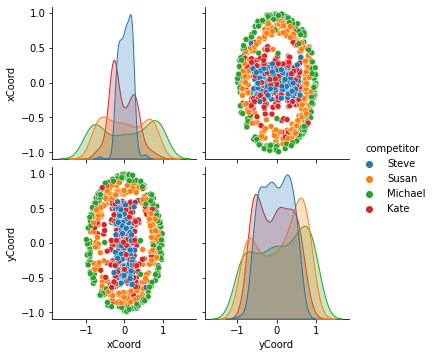

In [35]:
# 绘制pairplot图
sns.pairplot(darts, hue='competitor')

In [48]:
# 实例化一个顺序模型
model = Sequential()
# 添加3个具有128、64和32个神经元的全连接层
model.add(Dense(128,input_shape=(2,),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

#输出层
# 添加一个具有与选手数量相等的神经元的全连接层
model.add(Dense(4, activation='softmax'))
# - 4：输出维度为4，对应于4个选手，用于多类别分类
# - activation='softmax'：使用Softmax激活函数，将输出转化为概率分布，用于多类别分类

# 使用 categorical_crossentropy 损失函数编译模型
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# - loss='categorical_crossentropy'：使用交叉熵作为损失函数，适用于多类别分类问题
# - optimizer='adam'：使用Adam优化器进行模型参数优化
# - metrics=['accuracy']：使用准确率作为评估指标

### 准备数据集
查看标签`darts.competitor`的格式还不能被您的网络理解。它们包含了选手的名字作为字符串。首先要将这些选手转换为唯一的数字，然后使用`tf.keras.utils`中的`to_categorical()`函数将这些数字转换为独热编码表示。

这在多类别分类问题中非常有用，因为输出神经元的数量与类别数量相同，对于数据集中的每个观测，我们只希望其中一个神经元被激活。

In [49]:
from tensorflow.keras.utils import to_categorical

# 将竞争者转换为分类变量
darts.competitor = pd.Categorical(darts.competitor)
# 为每个类别分配一个数字（标签编码）
darts.competitor = darts.competitor.cat.codes
# 打印标签编码后的竞争者
print('Label encoded competitors: \n', darts.competitor.head())

# 提取坐标信息（去除竞争者列）
coordinates = darts.drop(['competitor'], axis=1)
# 对标签进行one-hot编码
darts.competitor = to_categorical(darts.competitor)
# 打印one-hot编码后的竞争者
print('One-hot encoded competitors: \n', competitors)

Label encoded competitors: 
 0    2
1    3
2    1
3    0
4    2
Name: competitor, dtype: int8
One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


现在，每个竞争者都是一个长度为4的向量，除了表示其自身位置的位置外，其余位置都填充为零。



### 对飞镖选手进行训练
现在，您的模型已经准备好，数据集也准备就绪。是时候开始训练了！

我们刚刚转换的`coordinates`特征和`competitors`标签已经被分成了`coord_train`、`coord_test`和`competitors_train`、`competitors_test`。

让我们通过观察靶板来判断是哪个选手扔出了哪个飞镖！

In [50]:
coordinates = darts[['xCoord', 'yCoord']]
coordinates.head()

,xCoord,yCoord
0,0.196451,-0.520341
1,0.476027,-0.306763
2,0.003175,-0.980736
3,0.294078,0.267566
4,-0.051120,0.598946


In [51]:
#拆分测试集和训练集
coord_train, coord_test, competitors_train, competitors_test = \
    train_test_split(coordinates, competitors, test_size=0.25, stratify=competitors)

In [52]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               384       
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 4)                 132       
                                                                 
Total params: 10,852
Trainable params: 10,852
Non-trainable params: 0
_________________________________________________________________


In [53]:
# 将模型适配到训练数据上进行200个轮次的训练
model.fit(coord_train, competitors_train, epochs=200)

# 在测试数据上评估模型的准确率
accuracy = model.evaluate(coord_test, competitors_test)[1]

# 打印准确率
print('准确率:', accuracy)

Epoch 1/200
19/19 [==============================] - 0s 4ms/step - loss: 1.3714 - accuracy: 0.2533
Epoch 2/200
19/19 [==============================] - 0s 4ms/step - loss: 1.3349 - accuracy: 0.2950
Epoch 3/200
19/19 [==============================] - 0s 4ms/step - loss: 1.2955 - accuracy: 0.3300
Epoch 4/200
19/19 [==============================] - 0s 4ms/step - loss: 1.2483 - accuracy: 0.3667
Epoch 5/200
19/19 [==============================] - 0s 4ms/step - loss: 1.1956 - accuracy: 0.4350
Epoch 6/200
19/19 [==============================] - 0s 3ms/step - loss: 1.1341 - accuracy: 0.4983
Epoch 7/200
19/19 [==============================] - 0s 4ms/step - loss: 1.0720 - accuracy: 0.5450
Epoch 8/200
19/19 [==============================] - 0s 4ms/step - loss: 0.9922 - accuracy: 0.5917
Epoch 9/200
19/19 [==============================] - 0s 4ms/step - loss: 0.9233 - accuracy: 0.6333
Epoch 10/200
19/19 [==============================] - 0s 3ms/step - loss: 0.8738 - accuracy: 0.6650
Epoch 11/

### Softmax概率预测
这个模型表现得很好！这就是为什么您在测试集上获得了高准确率的原因。

由于使用了`softmax`激活函数，对于模型输入的每组2个坐标，都会得到一个包含4个数字的输出向量。其中的每个数字都表示一个给定飞镖由4名选手之一扔出的概率。

当使用模型的`.evaluate()`方法计算准确率时，您的模型会将具有最高概率的类别作为预测结果。可以使用`np.argmax()`来实现此功能，因为它会返回数组中最大值的索引。

使用存储在`coords_small_test`中的测试投掷集合和`np.argmax()`来尝试一下！

In [54]:
coords_small_test = pd.DataFrame({
    'xCoord':[0.209048, 0.082103, 0.198165, -0.348660, 0.214726],
    'yCoord':[-0.077398, -0.721407, -0.674646, 0.035086, 0.183894]
})

competitors_small_test = np.array([[0., 0., 1., 0.], [0., 0., 0., 1.],
                                   [0., 0., 0., 1.], [1., 0., 0., 0.],
                                   [0., 0., 1., 0.]])

In [55]:
# 对coords_small_test进行预测
preds = model.predict(coords_small_test)

# 打印预测结果和真实值
print("{:45} | {}".format("原始模型预测", "真实标签"))
for i, pred in enumerate(preds):
    print("{} | {}".format(pred, competitors_small_test[i]))

1/1 [==============================] - 0s 75ms/step
原始模型预测                                        | 真实标签
[0.38502663 0.01726404 0.5904662  0.00724318] | [0. 0. 1. 0.]
[0.09308034 0.03047162 0.06588383 0.8105642 ] | [0. 0. 0. 1.]
[0.30510804 0.05148131 0.2612279  0.38218278] | [0. 0. 0. 1.]
[0.9607479  0.00201951 0.0360607  0.00117192] | [1. 0. 0. 0.]
[0.44625965 0.01637539 0.5310497  0.00631525] | [0. 0. 1. 0.]


In [56]:
# 从每个预测向量中提取概率最高的位置
preds_chosen = [np.argmax(pred) for pred in preds]

# 打印预测结果和真实值
print("{:10} | {}".format("           取整的模型预测 ", "真实标签"))
for i, pred in enumerate(preds_chosen):
    print("{:25} | {}".format(pred, competitors_small_test[i]))

           取整的模型预测  | 真实标签
                        2 | [0. 0. 1. 0.]
                        3 | [0. 0. 0. 1.]
                        3 | [0. 0. 0. 1.]
                        0 | [1. 0. 0. 0.]
                        2 | [0. 0. 1. 0.]


可以轻松解释softmax输出。这还可以帮助发现网络对于预测哪个类别不太确定的观测结果，因为可以看到每个预测的类别概率分布。

## 多标签分类

创建一个智能灌溉机，通过它来自动化农田的浇水。多标签分类问题与多类别问题不同之处在于，每个观测数据可以用零个或多个类别进行标记。因此，类别/标签不是互斥的，基于输入，你可以对农田的所有、一部分或任意组合进行浇水。

为了适应这种行为，我们需要使用具有与类别数量相等的神经元的输出层，但与多类别问题不同的是，这次每个输出神经元都使用`sigmoid`激活函数。这使得输出层中的每个神经元能够独立地输出一个介于0和1之间的数字。

In [78]:
irrigation = pd.read_csv('../data/irrigation_machine.csv', index_col=0)
irrigation.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [79]:
# 实例化一个Sequential模型
model = Sequential()

# 添加一个具有64个神经元的隐藏层，输入维度为20
model.add(Dense(64,input_shape=(20,),activation='relu'))
# - 64：隐藏层包含64个神经元
# - input_shape=(20,)：输入维度为20，对应于具有20个特征的输入向量
# - activation='relu'：使用ReLU作为激活函数，增加模型的非线性能力

# 添加一个具有3个神经元的输出层，使用 sigmoid 激活函数
model.add(Dense(3,activation='sigmoid'))
# - 3：输出层包含3个神经元，对应于3个类别
# - activation='sigmoid'：使用 sigmoid 激活函数将输出值限制在 0 和 1 之间，适用于多标签分类问题

# 使用 binary_crossentropy 损失函数编译模型
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# - optimizer='adam'：使用 Adam 优化器进行模型参数优化
# - loss='binary_crossentropy'：使用 binary_crossentropy 作为损失函数，适用于多标签分类问题
# - metrics=['accuracy']：使用准确率作为评估指标来衡量模型的性能

# 打印模型的概述信息
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                1344      
                                                                 
 dense_36 (Dense)            (None, 3)                 195       
                                                                 
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


已经为3个不同的问题构建了3个模型！希望大家开始了解在神经网络领域中如何对不同问题建模的感觉。



多标签模型的输出可能如下所示：`[0.76, 0.99, 0.66]`。如果我们将大于0.5的概率四舍五入取整，那么这个观测结果将被分类为包含所有3个可能的标签`[1, 1, 1]`。对于这个特定的问题，这意味着根据网络的输入传感器测量值，灌溉农场中的所有3个地块是正确的做法。

接下来，您将使用刚刚构建的模型进行训练和预测。`sensors_train`、`parcels_train`、`sensors_test`和`parcels_test`已经加载好，供您使用。

让我们看看您的智能机器表现如何！

In [80]:
parcels = irrigation[['parcel_0', 'parcel_1', 'parcel_2']].to_numpy()
sensors = irrigation.drop(['parcel_0', 'parcel_1', 'parcel_2'], axis=1).to_numpy()

sensors_train, sensors_test, parcels_train, parcels_test = \
    train_test_split(sensors, parcels, test_size=0.3, stratify=parcels)

In [81]:
# 使用验证集比例为0.2进行100个轮次的训练
model.fit(sensors_train,parcels_train,epochs=100,validation_split=0.2)

# 在sensors_test上进行预测，并对预测结果进行四舍五入
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# 打印四舍五入后的预测结果
print('四舍五入的预测结果：\n', preds_rounded)

# 在测试数据上评估模型的准确率
accuracy = model.evaluate(sensors_test,parcels_test)[1]
# 打印准确率
print('准确率:', accuracy)

Epoch 1/100
35/35 [==============================] - 1s 7ms/step - loss: 0.6085 - accuracy: 0.4634 - val_loss: 0.5522 - val_accuracy: 0.5964
Epoch 2/100
35/35 [==============================] - 0s 5ms/step - loss: 0.4653 - accuracy: 0.5777 - val_loss: 0.4630 - val_accuracy: 0.5750
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 0.3988 - accuracy: 0.6161 - val_loss: 0.4147 - val_accuracy: 0.5857
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 0.3568 - accuracy: 0.6116 - val_loss: 0.3817 - val_accuracy: 0.5679
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 0.3314 - accuracy: 0.6286 - val_loss: 0.3561 - val_accuracy: 0.6464
Epoch 6/100
35/35 [==============================] - 0s 5ms/step - loss: 0.3159 - accuracy: 0.6116 - val_loss: 0.3376 - val_accuracy: 0.5929
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 0.3001 - accuracy: 0.6170 - val_loss: 0.3324 - val_accuracy: 0.5679
Epoch 8/100
3